In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import datetime

import matplotlib.pyplot as plt
import seaborn

import warnings
warnings.filterwarnings("ignore")

In [25]:
sf_2019_1 = pd.read_csv('data_activity/sf_2019-01-03.csv')
sf_2019_2 = pd.read_csv('data_activity/sf_2019-04-06.csv')
sf_2019_3 = pd.read_csv('data_activity/sf_2019-07-12.csv')
sf_2018_1 = pd.read_csv('data_activity/sf_2018-01-03.csv')
sf_2018_2 = pd.read_csv('data_activity/sf_2018-04-06.csv')
sf_2018_3 = pd.read_csv('data_activity/sf_2018-07-10.csv')
sf_2017 = pd.read_csv('data_activity/sf_2017-01-12.csv')
sf_2020_1 = pd.read_csv('data_activity/sf_2020-01-06.csv')
sf_2020_2 = pd.read_csv('data_activity/sf_2020-07-12.csv')

In [4]:
challenge_2017 = pd.read_csv('data/CNC_San_Francisco_2017.csv')
challenge_2018 = pd.read_csv('data/CNC_San_Francisco_2018.csv')
challenge_2019 = pd.read_csv('data/CNC_San_Francisco_2019.csv')
challenge_2020 = pd.read_csv('data/CNC_San_Francisco_2020.csv')

In [26]:
df = pd.concat([sf_2019_1, sf_2019_2, sf_2019_3, sf_2018_1, sf_2018_2, sf_2018_3, sf_2017, sf_2020_1, sf_2020_2], axis = 0)
print('done')


In [6]:
challenge_full = pd.concat([challenge_2017, challenge_2018, challenge_2019, challenge_2020])

print('done')

done


In [28]:
#df.to_csv('full_df.csv')
df.head()

,captive,created_at,created_time_zone,description,faves_count,geoprivacy,iconic_taxon_name,id,identifications,identifications_most_agree,...,taxon_observations,taxon_parent_id,taxon_rank,taxon_search_rank,taxon_threatened,time_observed_at,updated_at,user_id,user_login,date
0,False,2014-03-28T11:14:18-07:00,America/Los_Angeles,NaN,0,NaN,Insecta,586716,"[{'user_id': 477, 'category': 'improving', 'di...",True,...,44543.0,51703.0,species,44543.0,False,2019-03-08T11:10:00-08:00,2019-03-08T18:08:36-08:00,33895,rlaporte,2019-03-08 19:10:00+00:00
1,True,2017-05-10T10:30:04-07:00,America/Los_Angeles,- long skinny stocks \r\n- small yellow buds \...,0,NaN,Plantae,6161491,"[{'user_id': 1, 'category': 'leading', 'disagr...",False,...,98639.0,548591.0,genus,98639.0,False,2019-03-13T10:25:53-07:00,2019-05-19T10:49:13-07:00,477473,mialauer,2019-03-13 17:25:53+00:00
2,False,2017-05-10T11:34:29-07:00,America/Los_Angeles,- talons on legs\r\n- large\r\n- striped segme...,0,NaN,Insecta,6162066,"[{'user_id': 373869, 'category': 'improving', ...",True,...,16959.0,523728.0,genus,16959.0,False,2019-03-04T11:15:22-08:00,2020-05-21T21:13:40-07:00,477473,mialauer,2019-03-04 19:15:22+00:00
3,False,2017-05-10T11:34:35-07:00,America/Los_Angeles,- two eyes sprouting from body underneath shel...,0,NaN,Mollusca,6162070,"[{'user_id': 373869, 'category': 'improving', ...",True,...,29427.0,87634.0,species,29427.0,False,2019-03-17T11:28:28-07:00,2019-05-19T10:52:12-07:00,477473,mialauer,2019-03-17 18:28:28+00:00
4,False,2017-05-10T11:34:44-07:00,America/Los_Angeles,- broken wing\r\n- small legs\r\n- brown pigme...,0,NaN,Insecta,6162071,"[{'user_id': 373869, 'category': 'improving', ...",True,...,4866.0,1081313.0,species,4866.0,False,2019-03-16T11:10:41-07:00,2020-05-17T16:51:04-07:00,477473,mialauer,2019-03-16 18:10:41+00:00


In [27]:
df['date'] = pd.to_datetime(df['time_observed_at'], errors='coerce', utc = True)

In [29]:
df['date'] = df['date'].dt.tz_convert('US/Pacific')

In [30]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [31]:
sf_4_2019 = df[(df['month'] == 4) & (df['year'] == 2019)]

In [32]:
sf_4_2019.to_csv('sf_4_2019.csv')

In [14]:
#challenge_2019['date'] = pd.to_datetime(challenge_2019['time_observed_at'], errors='coerce')
#challenge_2019['month'] = challenge_2019['date'].dt.month
#challenge_2019['day'] = challenge_2019['date'].dt.day
#challenge_2019['year'] = challenge_2019['date'].dt.year

In [33]:
df = df.dropna(subset = ['time_observed_at'])

In [16]:
#df['year_month'] = df.year.astype(int).astype(str) + '-' + df.month.astype(int).astype(str)

In [17]:
#df_ident = pd.DataFrame()
    
#for _, row in df.iterrows():
#    idents = row['identifications']
#    if pd.isnull(idents) == False:
#        df_temp = pd.DataFrame(eval(idents))
#        df_temp['target'] = np.repeat(row['user_id'], df_temp.shape[0])
#        df_ident = df_ident.append(df_temp)

In [34]:
def addMonths(d, x):
    
    newmonth = (((d.month - 1) + x) % 12) + 1
    newyear  = d.year + (((d.month - 1) + x) // 12)
    
    return newmonth, newyear

In [48]:
def analyze_attrition(df, year, window, first_m, last_m, draw = True, y_axis = 'percent'):
    '''
    The function claculates attrition of new users coming to the platform 
    
    Attribute:
        df - Pandas DataFrame with all years combined
        year - int value: identifies the year of analysis
        window - int value: identifies the timeframe (number of months) for how many months the users of our interest stayed on the platform. 
        first_m, last_m - int values: identifies the timeframe of the analysis
        draw - Boolean value: if True, the function returns the chart for the chosen timeframe; if False, the function returns a Pandas DataFrame
        y_axis - categorical value (percent or num_users): percent returns percentages, num_users returns absolute counts
        
    Returns:
        Seaborn chart of Pandas DataFrame (depends on the chosen value for 'draw' argument)
    '''
    sns.set_style("whitegrid")

    df_year = df[df['year'] >= year]
    final_df = pd.DataFrame()
    
    for month in range(1, 13):
        
        this_month = str(year) + '-' + str(month) + '-' + str(1)
        existing_users = df[df['date'] < this_month]['user_id'].unique()
        users = df_year[df_year['month'] == month]['user_id'].unique()
        new_users = np.setdiff1d(users, existing_users)
        number = len(new_users)
        
        first_month = addMonths(datetime.datetime(year, month, 1), 1)[0]
        first_year = addMonths(datetime.datetime(year, month, 1), 1)[1]
        first_date = str(first_year) + '-' + str(first_month) + '-' + str(1)
        
        last_month = addMonths(datetime.datetime(year, month, 1), window)[0]
        last_year = addMonths(datetime.datetime(year, month, 1), window)[1]
        if month + window == 12:
            last_date = str(year + 1) + '-' + str(1) + '-' + str(1)
        else:
            last_date = str(last_year) + '-' + str(last_month + 1) + '-' + str(1)

        window_df = df_year[(df_year['date'] >= first_date) & 
                            (df_year['date'] <= last_date) & 
                         (df_year['user_id'].isin(new_users))]

        users_months = window_df.groupby(['user_id', 'month'])['id'].count().reset_index()
        activity_after = users_months['user_id'].value_counts().reset_index()['user_id'].value_counts().reset_index()
        activity_after.columns = ['num_months', 'num_users']
        activity_after['month'] = np.repeat(month, activity_after.shape[0])
        new_row = {'num_months' : 0, 'num_users' : number - activity_after['num_users'].sum(), 'month' : month}
        activity_after = activity_after.append(new_row, ignore_index=True)
        activity_after['percent'] = np.round((np.array(activity_after['num_users']) / number) * 100, 0)

        final_df = pd.concat([final_df, activity_after])
        
    final_df['Month'] = final_df['month'].astype('str')
    
    months_sums = final_df.groupby('Month')['num_users'].sum()
    
    months = {'1' : 'January'+ ' ' + str(year) + '\n(N = ' + str(months_sums['1']) + ')', 
              '2' : 'February' + ' ' + str(year) + '\n(N = ' + str(months_sums['2']) + ')', 
              '3' : 'March'+ ' ' + str(year) + '\n(N = ' + str(months_sums['3']) + ')', 
              '4' : 'April'+ ' ' + str(year) + '\n(N = ' + str(months_sums['4']) + ')', 
              '5' : 'May'+ ' ' + str(year) + '\n(N = ' + str(months_sums['5']) + ')', 
              '6': 'June'+ ' ' + str(year) + '\n(N = ' + str(months_sums['6']) + ')', 
              '7': 'July'+ ' ' + str(year) + '\n(N = ' + str(months_sums['7']) + ')', 
              '8': 'August'+ ' ' + str(year) + '\n(N = ' + str(months_sums['8']) + ')', 
              '9': 'September'+ ' ' + str(year) + '\n(N = ' + str(months_sums['9']) + ')', 
              '10': 'October'+ ' ' + str(year) + '\n(N = ' + str(months_sums['10']) + ')', 
              '11': 'November'+ ' ' + str(year) + '\n(N = ' + str(months_sums['11']) + ')', 
              '12': 'December'+ ' ' + str(year) + '\n(N = ' + str(months_sums['12']) + ')'} 
    
    final_df['Month']= final_df['Month'].map(months) 
    final_df = final_df[(final_df['month'] >= first_m) & (final_df['month'] <= last_m)]
    
    if draw: 
        sns.set_style("whitegrid")
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        sns.set_style("whitegrid")

        g = sns.catplot(x="num_months", y = y_axis,  kind = 'bar', col_wrap=6, col = 'Month', color='b',
                data=final_df, height=5.5, aspect=.8)
        if y_axis == 'percent':
            g.set_axis_labels("Number of months \n users stayed on the platform", "Percentage of new users")
        else:
            g.set_axis_labels("Number of months \n users stayed on the platform", "Count of new users")
        return g
        
    else:
        return final_df

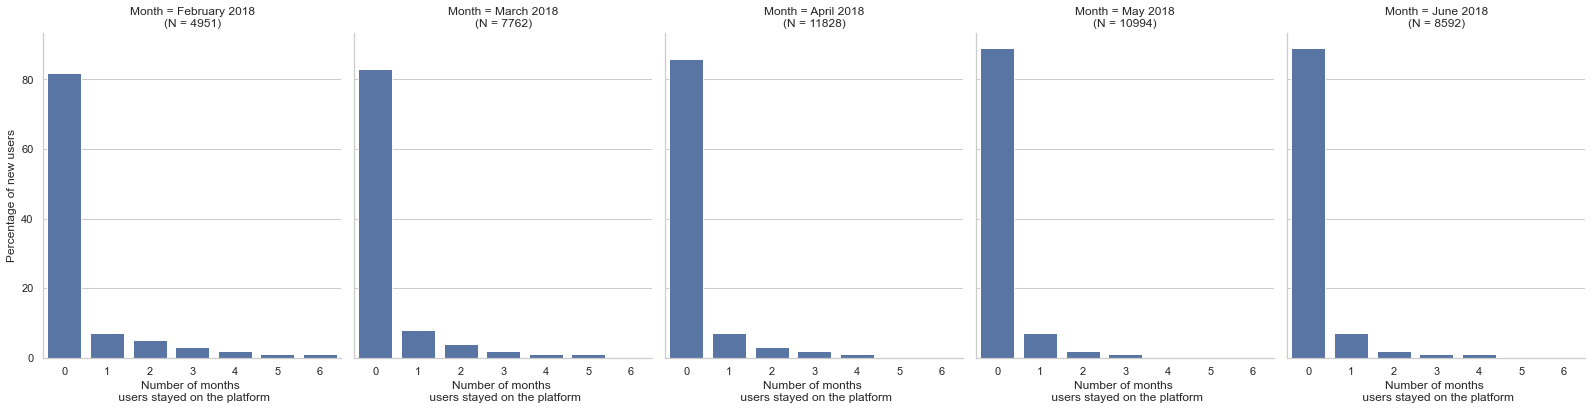

In [50]:
sns.set_style("whitegrid")

sns_plot = analyze_attrition(df, year = 2018, window = 6, first_m = 2, last_m = 6, y_axis = 'percent', draw = True)
sns_plot.savefig('sf_output_2018.png')

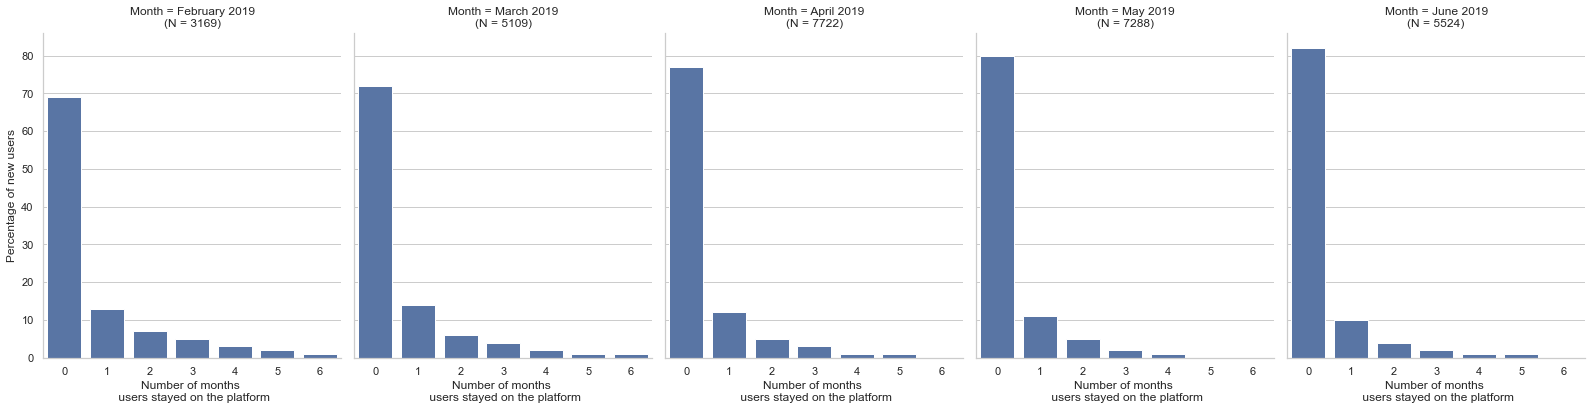

In [51]:
sns.set_style("whitegrid")

sns_plot = analyze_attrition(df, year = 2019, window = 6, first_m = 2, last_m = 6, y_axis = 'percent')
sns_plot.savefig('sf_output_2019.svg')
sns_plot.savefig('sf_output_2019.png')



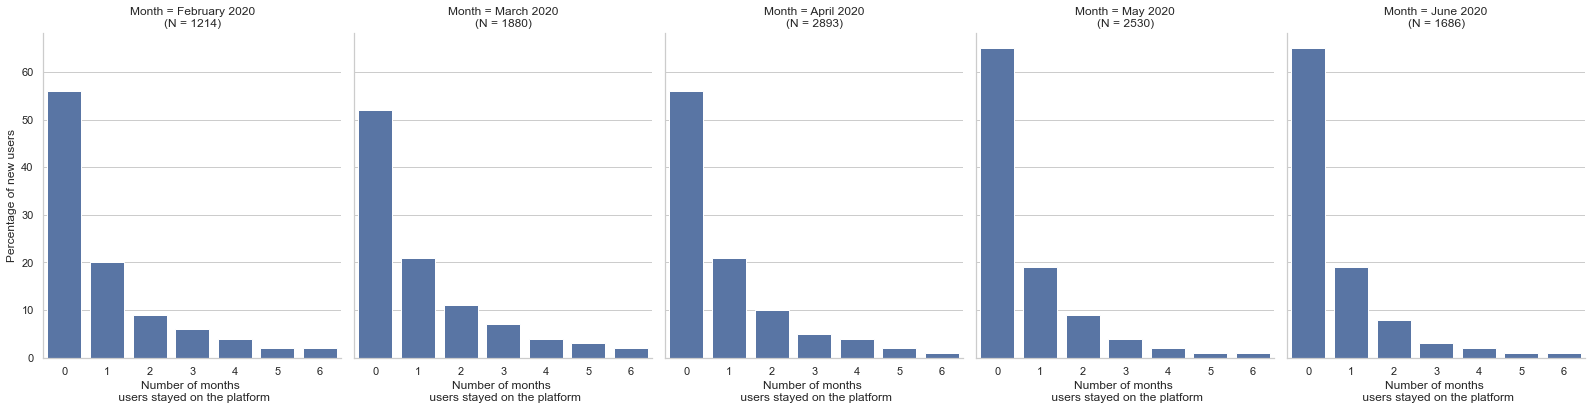

In [52]:
sns.set_style("whitegrid")

sns_plot = analyze_attrition(df, year = 2020, window = 6, first_m = 2, last_m = 6, y_axis = 'percent')
sns_plot.savefig('sf_output_2020.svg')
sns_plot.savefig('sf_output_2020.svg')



In [61]:
def compare_users(df, year, window, draw = True, y_axis = 'percent', challenge_df = None):
    '''
    The function compares attrition for regular new users and participants of the challenge
    
    Attribute:
        df - Pandas DataFrame with all years combined
        year - int value: identifies the year of analysis
        window - int value: identifies the timeframe (number of months) for how many months the users of our interest stayed on the platform. 
        draw - Boolean value: if True, the function returns the chart for the chosen timeframe; if False, the function returns a Pandas DataFrame
        y_axis - categorical value (percent or num_users): percent returns percentages, num_users returns absolute counts
        challenge_df = Pandas DataFrame with a certain challenge data
        
    Returns:
        Seaborn chart of Pandas DataFrame (depends on the chosen value for 'draw' argument)
    '''
    
    sns.set_style("whitegrid")
    
    df_year = df[df['year'] >= year]
    date = str(year)+ '-4-1'
    existing_users = df[df['date'] < date]['user_id'].unique()
    users = df_year[df_year['month'] == 4]['user_id'].unique()
    new_users = np.setdiff1d(users, existing_users)
    challenge_users = challenge_df['user_id'].unique()
    not_challenge = np.setdiff1d(new_users, challenge_users)
    num_challenge = len(challenge_users)
    num_not_challenge = len(not_challenge)
    
    first_month = addMonths(datetime.datetime(year, 4, 1), 1)[0]
    first_year = addMonths(datetime.datetime(year, 4, 1), 1)[1]
    first_date = str(first_year) + '-' + str(first_month) + '-' + str(1)
        
    last_month = addMonths(datetime.datetime(year, 4, 1), window)[0]
    last_year = addMonths(datetime.datetime(year, 4, 1), window)[1]
    if 4 + window == 12:
        last_date = str(year + 1) + '-' + str(1) + '-' + str(1)
    else:
        last_date = str(last_year) + '-' + str(last_month + 1) + '-' + str(1)
    
    window_df = df_year[(df_year['date'] >= first_date) & 
                    (df_year['date'] <= last_date) & 
                    (df_year['user_id'].isin(new_users))] 
    
    window_df['challenge'] = window_df['user_id'].apply(lambda user: 'yes' if user in challenge_users else 'no')
    obs_grouped = window_df.groupby(['user_id', 'month', 'challenge'])['id'].count().reset_index()
    users_months = obs_grouped.groupby('challenge')['user_id'].value_counts().reset_index(name = 'num_months')
    activity_after = users_months.groupby(['challenge', 'num_months'])['user_id'].count().reset_index()
    activity_after.columns = ['challenge', 'num_months', 'num_users']
    sums = activity_after.groupby('challenge').sum('user_id').reset_index()
    zero_challenge = {'challenge': 'yes', 'num_months' : 0, 'num_users' : num_challenge - int(sums[sums['challenge'] == 'yes']['num_users'])}
    zero_not = {'challenge': 'no', 'num_months' : 0, 'num_users' : num_not_challenge - int(sums[sums['challenge'] == 'no']['num_users'])}
    activity_after = activity_after.append(zero_challenge, ignore_index=True)
    activity_after = activity_after.append(zero_not, ignore_index=True)
    first_part = activity_after[activity_after['challenge'] == 'yes']
    first_part['percent'] = np.round((np.array(first_part['num_users']) / num_challenge) * 100, 0)
    second_part = activity_after[activity_after['challenge'] == 'no']
    second_part['percent'] = np.round((np.array(second_part['num_users']) / num_not_challenge) * 100, 0)
    final_df = pd.concat([first_part, second_part])

    add_titles = final_df.groupby('challenge')['num_users'].sum()
    titles_dict = {'yes': 'New participants of the challenge' + '\n(N = ' + str(add_titles['yes']) + ')',
                  'no': 'Regular new users' + '\n(N = ' + str(add_titles['no']) + ')'}
    final_df['challenge']= final_df['challenge'].map(titles_dict) 
    
    if draw: 
        
        sns.set_style("whitegrid")
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        sns.set_style("whitegrid")
        
        g = sns.catplot(x="num_months", y = y_axis, col = 'challenge', kind = 'bar', data=final_df, height=5.5, aspect=.8, color = 'b')
        if y_axis == 'percent':
            g.set_axis_labels("Number of months users stayed \n on the platform after joining", "Percentage of new users")
        else:
            g.set_axis_labels("Number of months users stayed \n on the platform after joining", "Count of new users")
        return g
        sns.set_style("whitegrid")
    
        
    else:
        return final_df

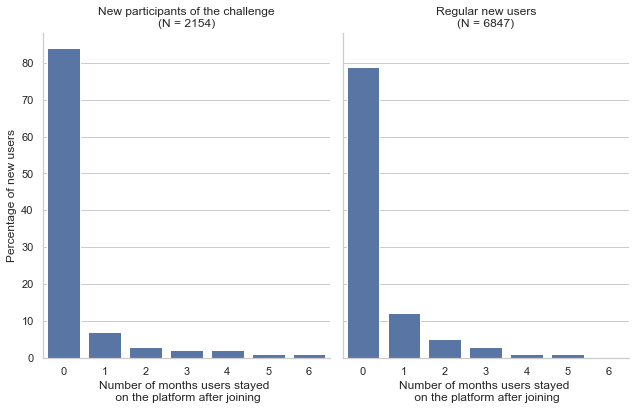

In [62]:

sns.set_style("whitegrid")
compare_2019 = compare_users(df, 2019, 6, challenge_df = challenge_2019)
compare_2019.set_titles("{col_name}")
compare_2019.savefig('sf2019.svg')
compare_2019.savefig('sf2019.png')


In [ ]:
compare_2020 = compare_users(df, 2020, 6, challenge_df = challenge_2020)
compare_2020.set_titles("{col_name}")
compare_2020.savefig('2020.png')

In [ ]:
compare_2018 = compare_users(df, 2018, 6, challenge_df = challenge_2018)
compare_2018.set_titles("{col_name}")
compare_2018.savefig('2018.png')